In [2]:
# data => Mall_Customers.csv

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
df.shape

(200, 5)

In [10]:
# separate the input data
x = df.iloc[:, [3, 4]]

In [12]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [15]:
x.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

#### viz

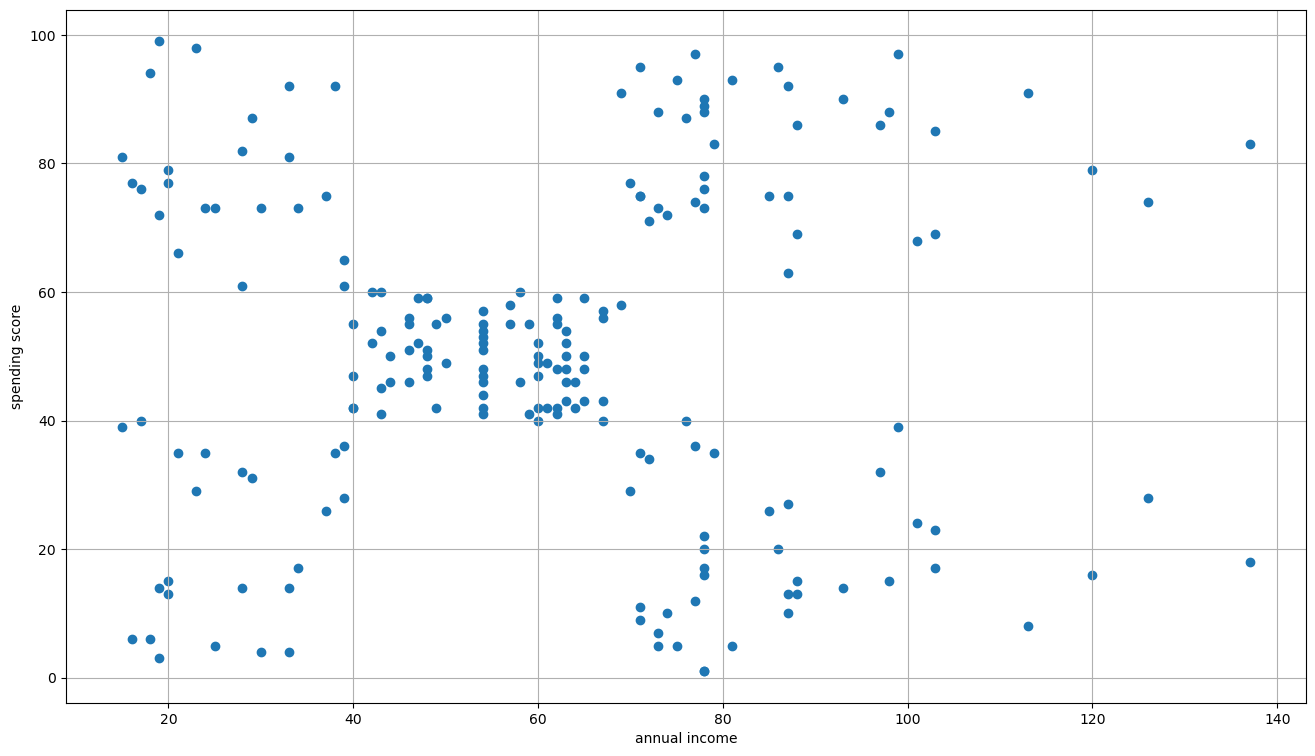

In [21]:
plt.figure(figsize=(16, 9))

plt.xlabel("annual income")
plt.ylabel("spending score")

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.grid();

In [23]:
# sum of squared error 

In [25]:
from sklearn.cluster import KMeans

In [33]:
km = KMeans(n_clusters= 3, random_state= 0)

In [35]:
labels = km.fit_predict(x)

In [37]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [39]:
km.inertia_

106348.3730621112

In [41]:
# find the SSE for 1 to 15 clusters

In [43]:
sse = []
for k in range(1, 16):
    km = KMeans(n_clusters= k, random_state= 0)
    km.fit_predict(x)
    sse.append(km.inertia_)

In [45]:
sse

[269981.27999999997,
 185917.14253928524,
 106348.37306211119,
 73679.78903948834,
 44448.45544793372,
 38858.9599751439,
 31969.426550235483,
 29858.483597603947,
 22209.851608025543,
 20786.936692059153,
 18612.222868009678,
 17083.672501709316,
 16511.947370563892,
 15599.148331445116,
 14697.298899626934]

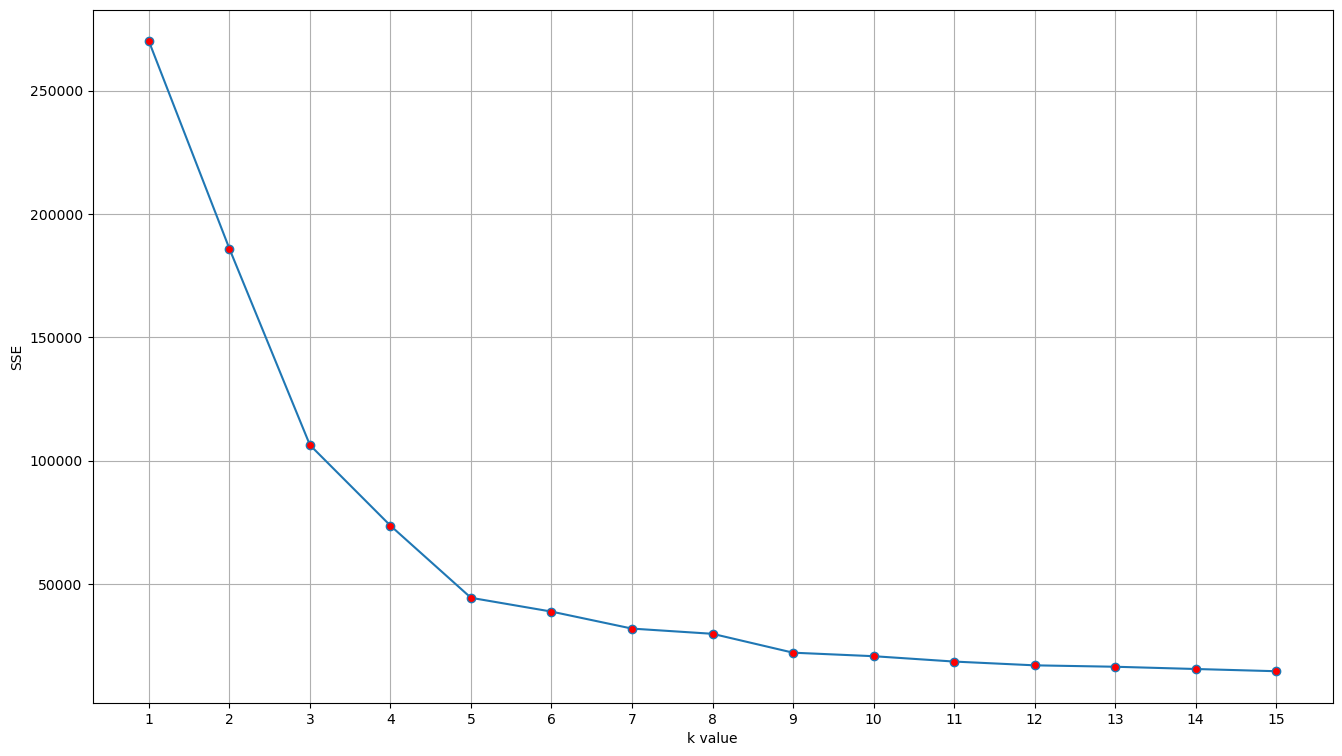

In [59]:
plt.figure(figsize=(16, 9))
plt.xlabel("k value")
plt.ylabel("SSE")
plt.xticks(range(0, 17, 1))
plt.plot(range(1, 16), sse, marker = "o", mfc = "red")
plt.grid();

In [61]:
# !pip install kneed

In [63]:
from kneed import KneeLocator

In [65]:
kl = KneeLocator(range(1, 16), sse, curve = "convex", direction= "decreasing")

In [67]:
kl.elbow

5

In [69]:
### Silh method

In [71]:
from sklearn.metrics import silhouette_score

In [77]:
silh = []
for k in range(2, 16):
    km = KMeans(n_clusters= k, random_state= 0)
    labels = km.fit_predict(x)
    score = silhouette_score(x, labels)
    silh.append(score)

In [79]:
silh

[0.3848654187182249,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.45705720010448403,
 0.45485522128402084,
 0.46072786639159125,
 0.4578527068857916,
 0.4221740515026349,
 0.4214357152930456,
 0.40598959614312446,
 0.3931580457193786,
 0.3848587883658634,
 0.38230811621951916]

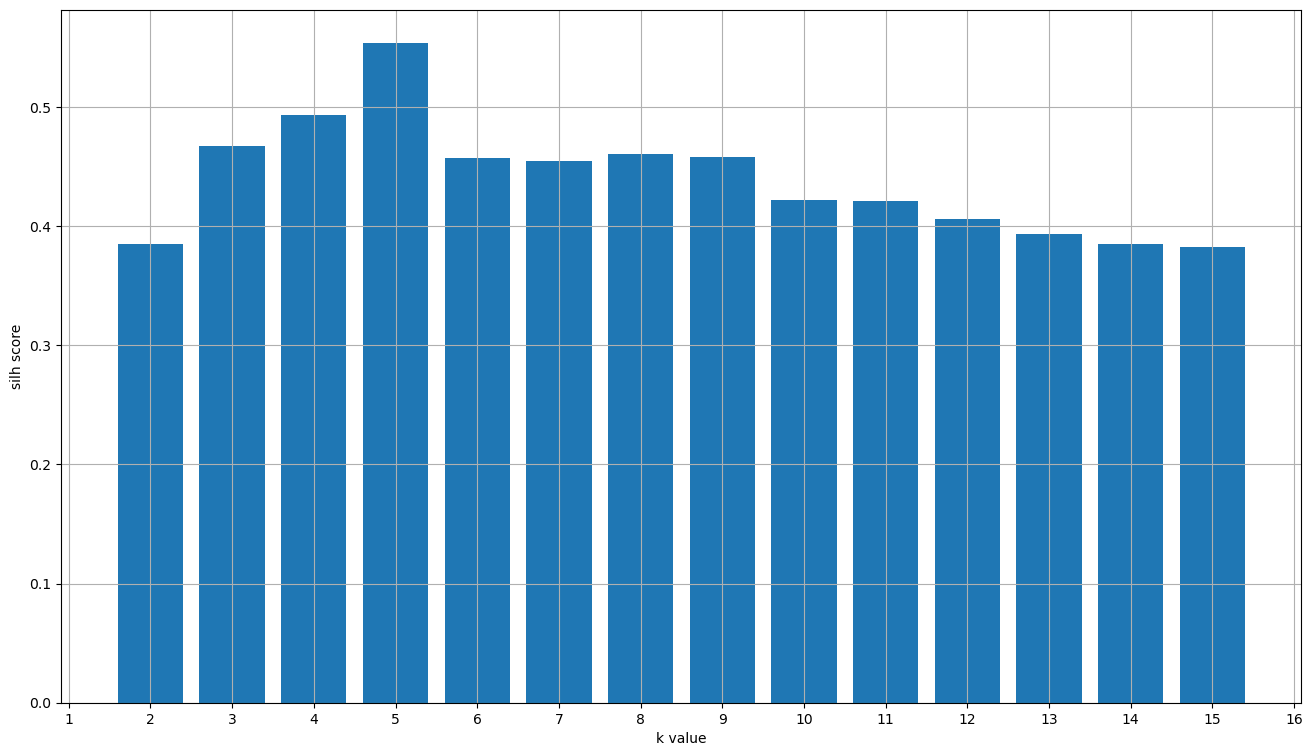

In [87]:
plt.figure(figsize=(16, 9))
plt.xlabel("k value")
plt.ylabel("silh score")
plt.xticks(range(0, 17, 1))
plt.bar(range(2, 16), silh)
plt.grid();

In [89]:
# build with five clusters

km = KMeans(n_clusters= 5, random_state= 0)
labels = km.fit_predict(x)

In [91]:
labels

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [93]:
km.inertia_

44448.45544793371

In [95]:
cent = km.cluster_centers_
cent

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

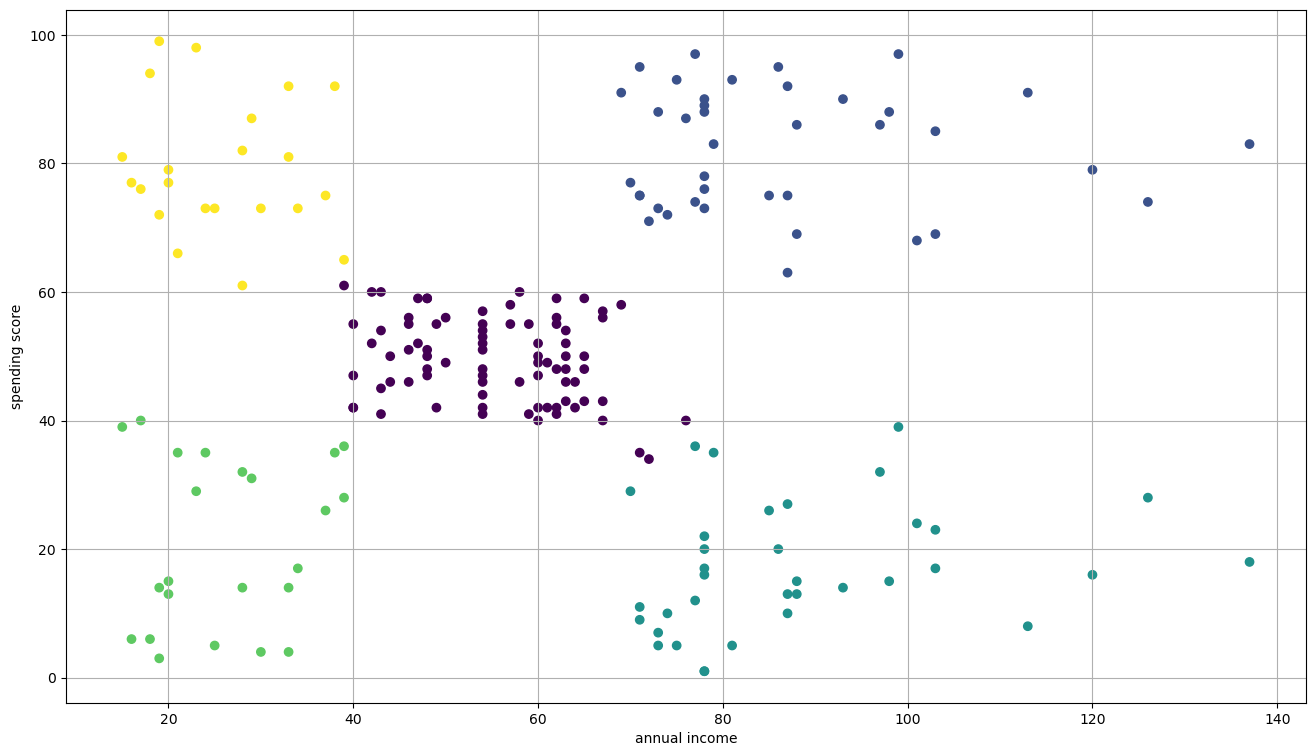

In [97]:
plt.figure(figsize=(16, 9))

plt.xlabel("annual income")
plt.ylabel("spending score")

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c = labels)
plt.grid();

In [99]:
# filter out the clusters

In [101]:
zero = df[labels == 0]

In [103]:
zero

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
43,44,Female,31,39,61
46,47,Female,50,40,55
47,48,Female,27,40,47
48,49,Female,29,40,42
49,50,Female,31,40,42
...,...,...,...,...,...
121,122,Female,38,67,40
122,123,Female,40,69,58
126,127,Male,43,71,35
132,133,Female,25,72,34


In [105]:
zero.shape

(81, 5)

In [107]:
new1 = [[45, 67]]
new2 = [[15, 57]]

In [115]:
import warnings
warnings.filterwarnings("ignore")

In [117]:
km.predict(new1)

array([0], dtype=int32)

In [119]:
km.predict(new2)

array([4], dtype=int32)